# Complex Problem involving the IS curve

# Problem 1

Suppose the economy is described by the following equations:

The IS curve: Y = 1200 - 50r + 0.8G
The LM curve: M/P = Y - 100r
The price level: P = 2
where Y is the level of output (GDP), r is the real interest rate, G is government spending, M is the nominal money supply, and P is the price level.

a) Graph the IS curve and LM curve on a single graph. Label the axes, curves, and equilibrium point.

b) Suppose the government increases spending from 100 to 200. Calculate the new equilibrium values of Y and r. Show the new equilibrium point on the graph.

c) Suppose instead that the central bank increases the money supply such that M/P increases from 100 to 120. Calculate the new equilibrium values of Y and r. Show the new equilibrium point on the graph.

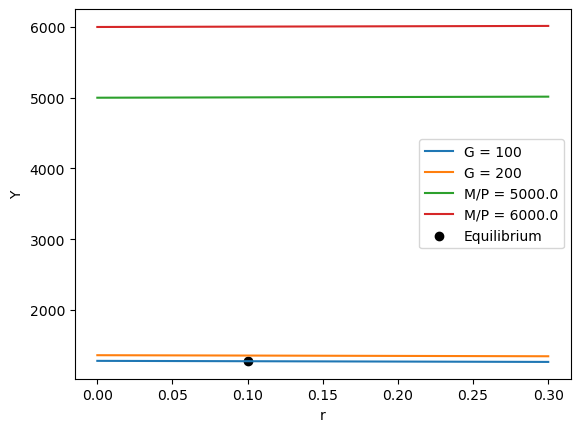

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Define the equations
def is_curve(r, G):
    return 1200 - 50 * r + 0.8 * G


def lm_curve(r, M):
    return (M / 2) + 50 * r


# Set up the graph
fig, ax = plt.subplots()
ax.set_xlabel('r')
ax.set_ylabel('Y')

# Plot the IS curve
r_values = np.linspace(0, 0.3, 100)
g_values = [100, 200]
for G in g_values:
    y_values = [is_curve(r, G) for r in r_values]
    ax.plot(r_values, y_values, label=f'G = {G}')

# Plot the LM curve
m_values = [10000, 12000]
for M in m_values:
    y_values = [lm_curve(r, M) for r in r_values]
    ax.plot(r_values, y_values, label=f'M/P = {M / 2}')

# Plot the equilibrium point
r_star = 0.1
y_star = is_curve(r_star, 100)
ax.scatter(r_star, y_star, color='black', label='Equilibrium')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [5]:
# Another Alternative Version

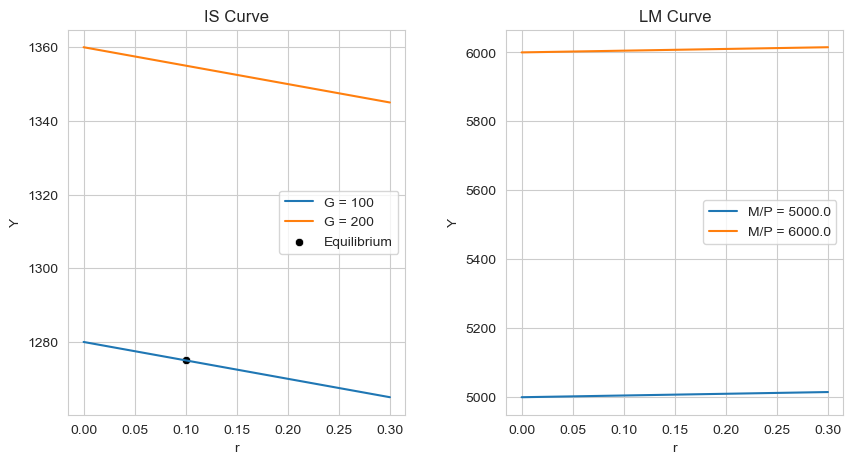

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the equations
def is_curve(r, G):
    return 1200 - 50*r + 0.8*G

def lm_curve(r, M):
    return (M/2) + 50*r

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# Set up the plot style
sns.set_style("whitegrid")

# Plot the IS curve
r_values = np.linspace(0, 0.3, 100)
g_values = [100, 200]
for G in g_values:
    y_values = [is_curve(r, G) for r in r_values]
    sns.lineplot(x=r_values, y=y_values, ax=axes[0], label=f'G = {G}')

# Set axis labels and title for the first plot
axes[0].set_xlabel('r')
axes[0].set_ylabel('Y')
axes[0].set_title('IS Curve')

# Plot the LM curve
m_values = [10000, 12000]
for M in m_values:
    y_values = [lm_curve(r, M) for r in r_values]
    sns.lineplot(x=r_values, y=y_values, ax=axes[1], label=f'M/P = {M/2}')

# Set axis labels and title for the second plot
axes[1].set_xlabel('r')
axes[1].set_ylabel('Y')
axes[1].set_title('LM Curve')

# Plot the equilibrium point
r_star = 0.1
y_star = is_curve(r_star, 100)
sns.scatterplot(x=[r_star], y=[y_star], ax=axes[0], color='black', label='Equilibrium')

# Add legend to both plots
axes[0].legend()
axes[1].legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


In [8]:
# Extended Version for the is and lm curve function using more complex methods

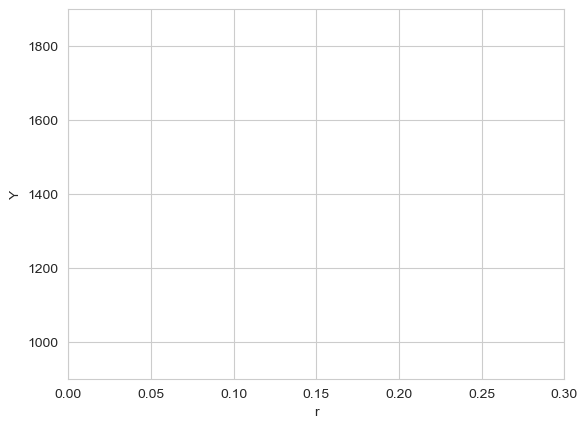

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import optimize


# Define the equations
def is_curve(r, G):
    return 1500 - 100*r + 1.5*G - 0.5*r**2 - 0.25*G**2

def lm_curve(r, M, P):
    return np.log(M/P) + 2*r - 0.2*r**2

# Create a figure and set up the plot style
fig, ax = plt.subplots()
sns.set_style("whitegrid")

# Set up the axes
ax.set_xlabel('r')
ax.set_ylabel('Y')
ax.set_xlim(0, 0.3)
ax.set_ylim(900, 1900)

# Define the range of values to animate over
G_values = [100, 150, 200]
M_values = [10000, 11000, 12000]
P = 2

# Define the initial plot
r_values = np.linspace(0, 0.3, 100)
y_is = [is_curve(r, G_values[0]) for r in r_values]
y_lm = [lm_curve(r, M_values[0], P) for r in r_values]
is_line, = ax.plot(r_values, y_is, label='IS Curve')
lm_line, = ax.plot(r_values, y_lm, label='LM Curve')
eq_point = ax.scatter(0, 0, color='black', label='Equilibrium')

# Define the update function for the animation
def update(frame):
    G = G_values[frame % len(G_values)]
    M = M_values[frame % len(M_values)]
    
    # Update the IS and LM curves
    y_is = [is_curve(r, G) for r in r_values]
    y_lm = [lm_curve(r, M, P) for r in r_values]
    is_line.set_ydata(y_is)
    lm_line.set_ydata(y_lm)
    
    # Update the equilibrium point
    def f(r):
        return is_curve(r, G) - lm_curve(r, M, P)
    r_star = optimize.brentq(f, 0, 0.3)
    y_star = is_curve(r_star, G)
    eq_point.set_offsets(np.array([[r_star, y_star]]))
    
    # Update the legend
    ax.legend()

# Create the animation object
ani = FuncAnimation(fig, update, frames=range(len(G_values)*len(M_values)), interval=1000)

# Assign the animation object to a variable
my_anim = ani

# Show the plot
plt.show()
